In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
print(os.listdir("./input"))

['recipes.json', 'recipes1000.json']


In [2]:
df = pd.read_json("./input/recipes.json")

In [3]:
df.head(5)

,Url,Instructions,Ingredients,Day,Name,Year,Month,Weekday
0,https://www.chefkoch.de/rezepte/185441079701305/,Die Eier hart kochen. Dann pellen und mit eine...,"[600 g Hackfleisch, halb und halb, 800 g Sauer...",1,Gebratener Hasenrücken,2009,January,Thursday
1,https://www.chefkoch.de/rezepte/2718181424631245/,Vorab folgende Bemerkung: Alle Mengen sind Cir...,"[1 kg Strauchtomate(n), 1 Gemüsezwiebel(n), 1 ...",1,Pilz Stroganoff,2017,July,Saturday
2,https://www.chefkoch.de/rezepte/46341015661368/,"Die Kirschen abtropfen lassen, dabei den Saft ...","[1 Glas Kirsche(n), 1 Pck. Vanillepuddingpulve...",1,Kaninchen a la Gioff,2007,January,Monday
3,https://www.chefkoch.de/rezepte/51051018014178/,"Den Spargel säubern, die holzigen Enden abschn...","[500 g Spargel, grüner, 300 ml Brühe oder Fond...",1,Spanisches Knoblauch-Kaninchen,2013,April,Monday
4,https://www.chefkoch.de/rezepte/1555771262860408/,Kohlrabi schälen und klein würfeln. Mit der Br...,"[250 g Kohlrabi, 150 ml Gemüsebrühe, 150 ml Mi...",1,Gnocchi - Hack - Pfanne mit Basilikum,2017,August,Tuesday


In [4]:
# Delete Duplicate Rows
duplicate=df.drop_duplicates(['Name'],keep='first')
print("Number of Duplicated Rows: ",len(duplicate))

duplicate.head()

Number of Duplicated Rows:  192


,Url,Instructions,Ingredients,Day,Name,Year,Month,Weekday
0,https://www.chefkoch.de/rezepte/185441079701305/,Die Eier hart kochen. Dann pellen und mit eine...,"[600 g Hackfleisch, halb und halb, 800 g Sauer...",1,Gebratener Hasenrücken,2009,January,Thursday
1,https://www.chefkoch.de/rezepte/2718181424631245/,Vorab folgende Bemerkung: Alle Mengen sind Cir...,"[1 kg Strauchtomate(n), 1 Gemüsezwiebel(n), 1 ...",1,Pilz Stroganoff,2017,July,Saturday
2,https://www.chefkoch.de/rezepte/46341015661368/,"Die Kirschen abtropfen lassen, dabei den Saft ...","[1 Glas Kirsche(n), 1 Pck. Vanillepuddingpulve...",1,Kaninchen a la Gioff,2007,January,Monday
3,https://www.chefkoch.de/rezepte/51051018014178/,"Den Spargel säubern, die holzigen Enden abschn...","[500 g Spargel, grüner, 300 ml Brühe oder Fond...",1,Spanisches Knoblauch-Kaninchen,2013,April,Monday
4,https://www.chefkoch.de/rezepte/1555771262860408/,Kohlrabi schälen und klein würfeln. Mit der Br...,"[250 g Kohlrabi, 150 ml Gemüsebrühe, 150 ml Mi...",1,Gnocchi - Hack - Pfanne mit Basilikum,2017,August,Tuesday


In [5]:
# Remove unnecessary Column
df = df.drop(['Day','Month','Url','Weekday','Year'],axis=1)

df.head()

,Instructions,Ingredients,Name
0,Die Eier hart kochen. Dann pellen und mit eine...,"[600 g Hackfleisch, halb und halb, 800 g Sauer...",Gebratener Hasenrücken
1,Vorab folgende Bemerkung: Alle Mengen sind Cir...,"[1 kg Strauchtomate(n), 1 Gemüsezwiebel(n), 1 ...",Pilz Stroganoff
2,"Die Kirschen abtropfen lassen, dabei den Saft ...","[1 Glas Kirsche(n), 1 Pck. Vanillepuddingpulve...",Kaninchen a la Gioff
3,"Den Spargel säubern, die holzigen Enden abschn...","[500 g Spargel, grüner, 300 ml Brühe oder Fond...",Spanisches Knoblauch-Kaninchen
4,Kohlrabi schälen und klein würfeln. Mit der Br...,"[250 g Kohlrabi, 150 ml Gemüsebrühe, 150 ml Mi...",Gnocchi - Hack - Pfanne mit Basilikum


In [6]:
# Join Ingredients Array to Single String 
df['Ingredients'] = df['Ingredients'].apply(lambda x: ' '.join(x))

df.head()

,Instructions,Ingredients,Name
0,Die Eier hart kochen. Dann pellen und mit eine...,"600 g Hackfleisch, halb und halb 800 g Sauerkr...",Gebratener Hasenrücken
1,Vorab folgende Bemerkung: Alle Mengen sind Cir...,1 kg Strauchtomate(n) 1 Gemüsezwiebel(n) 1 Sal...,Pilz Stroganoff
2,"Die Kirschen abtropfen lassen, dabei den Saft ...","1 Glas Kirsche(n) 1 Pck. Vanillepuddingpulver,...",Kaninchen a la Gioff
3,"Den Spargel säubern, die holzigen Enden abschn...","500 g Spargel, grüner 300 ml Brühe oder Fond (...",Spanisches Knoblauch-Kaninchen
4,Kohlrabi schälen und klein würfeln. Mit der Br...,250 g Kohlrabi 150 ml Gemüsebrühe 150 ml Milch...,Gnocchi - Hack - Pfanne mit Basilikum


In [7]:
# Create Small Splited DataFrame & Save to json File (if You have weak CPU/GPU)

df = df[:1000]
df.to_json(r'./input/recipes1000.json')

In [8]:
print("we have {} Rows with {} column Recipes".format(df.shape[0], df.shape[1]))

we have 1000 Rows with 3 column Recipes


In [9]:
# !python -m spacy download de_core_news_sm  #use it in First Run

In [10]:
df.Instructions[0] #see What inside

'Die Eier hart kochen. Dann pellen und mit einem Eierschneider in Scheiben schneiden. Den Reis halbgar kochen und zur Seite stellen. Die Wurst (Kolbász) in dünne Scheiben schneiden.Den Knoblauch abziehen und fein würfeln. Die Zwiebel schälen, fein hacken und in etwas Fett glasig braten. Knoblauch und Hackfleisch dazu geben und so lange braten, bis das Hackfleisch schön krümelig wird. Den eigenen Saft nicht ganz verkochen lassen. Die Fleischmasse mit Salz, Pfeffer und Paprikapulver würzen.Das Sauerkraut kurz durchspülen, ausdrücken und abtropfen lassen (damit es nicht zu sauer wird). Das Sauerkraut in einen Topf geben und mit dem Kümmel und den Lorbeerblättern vermischen. Ca. 30 Minuten unter Zugabe von wenig Wasser bei niedriger Stufe dünsten.Eine feuerfeste Form mit etwas Öl einfetten und den Boden dünn mit Sauerkraut belegen. Darauf Kolbász und die Hälfte der in Scheiben geschnittene Eier verteilen, dann eine weitere dünne Schicht Sauerkraut drüber legen. Mit 1 Becher Schmand bedecke

In [11]:
# get 200 for Validation TF Model
eval_df = df[800:]
eval_df.shape

(200, 3)

In [12]:
# get 3000 for train TF Model
df = df[:800]
df.shape

(800, 3)

In [13]:
import spacy
nlp = spacy.load('de_core_news_sm' , disable=['parser', 'tagger', 'ner'])

In [14]:
tokenized = [nlp(t) for t in df['Instructions'].values]

In [16]:
vocab = {}
for txt in tokenized:
    for token in txt:
        if token.text not in vocab.keys() and len(token.text)> 2:
            vocab[token.text] = len(vocab)

In [17]:
print("Number of unique tokens: {} for Instructions".format(len(vocab)))

Number of unique tokens: 6365 for Instructions


In [18]:
#creating Labels
ingredients = df.Ingredients

print(ingredients[0])

600 g Hackfleisch, halb und halb 800 g Sauerkraut 200 g Wurst, geräucherte (Csabai Kolbász) 150 g Speck, durchwachsener, geräucherter 100 g Reis 1 m.-große Zwiebel(n) 1 Zehe/n Knoblauch 2 Becher Schmand 1/2TL Kümmel, ganzer 2 Lorbeerblätter Salz und Pfeffer 4 Ei(er) (bei Bedarf) Paprikapulver etwas Wasser Öl


In [19]:
# Clean & filter Each Ingredients

def _filter(token):
    if len(token) < 2:
        return False
    if token.is_stop:
        return False
    if token.text[0].islower():
        return False
    if token.is_digit:
        return False
    if token.like_num:
        return False
    return True

def _clean(text):
#     text = text.replace("(", "") #Already Filtered
#     text = text.replace(")", "") #Already Filtered
    text = text.split("/")[0]
    return text

In [20]:
# sample clean ingredients[214]
clean = [_clean(t.text) for t in nlp(ingredients[214]) if _filter(t) and len(_clean(t.text)) >= 2]
clean

['Rosenkohl',
 'Schalotte',
 '2Tasse',
 'Hühnerbrühe',
 'Milch',
 'EL',
 'Crème',
 'Speck',
 'Kartoffelgnocchi']

In [21]:
def get_labels(ingredients, tokenized_instructions):
    labels = []
    for ing, ti in zip(ingredients, tokenized_instructions):
        l_i = []
        ci = [_clean(t.text) for t in nlp(ing) if _filter(t) and len(_clean(t.text)) >= 2]
        label = []
        for token in ti:
            l_i.append(any((c == token.text or c == token.text[:-1] or c[:-1] == token.text) for c in ci))
        labels.append(l_i)
    return labels

In [22]:
labels = get_labels(ingredients, tokenized)
set([t.text for t, l in zip(tokenized[214], labels[214]) if l])

{'Crème', 'Hühnerbrühe', 'Milch', 'Rosenkohl', 'Schalotten', 'Speck'}

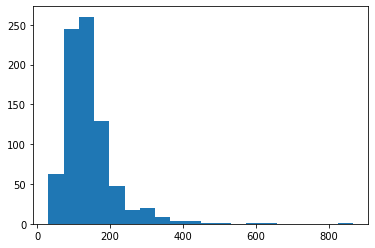

In [23]:
plt.hist([len([t for t in tokens]) for tokens in tokenized], bins=20);

In [24]:
MAX_LEN = 400

In [25]:
from keras.preprocessing.sequence import pad_sequences

def prepare_sequences(texts, max_len, vocab={}):
    X = [list(filter(None,[vocab.get(w.text,None) for w in s])) for s in texts]
    return pad_sequences(maxlen=max_len, sequences=X, padding="post", value=0.0)

In [26]:
X_seq = prepare_sequences(tokenized, max_len=MAX_LEN, vocab=vocab)

In [27]:
X_seq[0]

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,   3,   6,  15,  16,  17,  18,  19,  20,  10,  11,  12,  21,
        22,   6,  23,  24,  25,  26,  23,  27,   6,  28,  29,  30,  31,
        21,   6,  32,  33,  34,   6,  35,  31,  36,  37,  32,  38,  39,
        40,  12,  41,  42,  43,  44,  45,  46,  47,   7,  48,  49,   6,
        50,  51,  52,  53,  54,  55,  56,   6,  57,  46,  58,  43,  59,
        40,  52,  53,  60,  61,  34,   6,   7,  62,  63,   6,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,   7,  28,  80,   6,  64,  81,  82,   7,  53,  83,  84,  19,
         6,  85,  86,  87,  10,  88,   1,  89,  90,  91,  92,  20,  93,
        53,  94,  95,  96,  97,  98,  99, 100,  37,  32,   7,  62,  13,
       101,   6, 102,  87, 103, 104,  89,  96,  87, 105,  86,  87,   1,
        83,   6,  85, 106,  93,  53, 107, 108,  89, 109, 110, 111, 112,
         6,  53, 113, 114, 115, 116, 117, 118, 119,  95, 120, 10

In [28]:
y_seq = []
for l in labels:
    y_i = []
    for i in range(MAX_LEN):
        try:
            y_i.append(float(l[i]))
        except:
            y_i.append(0.0)
    y_seq.append(np.array(y_i))
y_seq = np.array(y_seq)
y_seq = y_seq.reshape(y_seq.shape[0], y_seq.shape[1], 1)

In [30]:
# ML with TensorFlow

import tensorflow as tf
from tensorflow.keras import layers

print(tf.version.VERSION)
print(tf.keras.__version__)

2.7.0
2.7.0


In [31]:
model = tf.keras.Sequential()
model.add(layers.Embedding(input_dim=len(vocab), mask_zero=True, output_dim=50))
model.add(layers.SpatialDropout1D(0.2))
model.add(layers.Bidirectional(layers.LSTM(units=64, return_sequences=True)))
model.add(layers.SpatialDropout1D(0.2))
model.add(layers.Bidirectional(layers.LSTM(units=64, return_sequences=True)))
model.add(layers.TimeDistributed(layers.Dense(1, activation='sigmoid')))

In [32]:
model.compile(optimizer=tf.optimizers.Adam(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          318250    
                                                                 
 spatial_dropout1d (SpatialD  (None, None, 50)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        58880     
 l)                                                              
                                                                 
 spatial_dropout1d_1 (Spatia  (None, None, 128)        0         
 lDropout1D)                                                     
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 128)        98816     
 nal)                                                   

In [34]:
history = model.fit(X_seq, y_seq, epochs=10, batch_size=256, validation_split=0.1)

Epoch 1/10
3/3 [==============================] - 76s 21s/step - loss: 0.1847 - accuracy: 0.6714 - val_loss: 0.1855 - val_accuracy: 0.9065
Epoch 2/10
3/3 [==============================] - 53s 18s/step - loss: 0.1717 - accuracy: 0.9039 - val_loss: 0.1631 - val_accuracy: 0.9065
Epoch 3/10
3/3 [==============================] - 56s 19s/step - loss: 0.1444 - accuracy: 0.9039 - val_loss: 0.1154 - val_accuracy: 0.9065
Epoch 4/10
3/3 [==============================] - 58s 20s/step - loss: 0.0987 - accuracy: 0.9039 - val_loss: 0.0960 - val_accuracy: 0.9065
Epoch 5/10
3/3 [==============================] - 61s 21s/step - loss: 0.0989 - accuracy: 0.9039 - val_loss: 0.1013 - val_accuracy: 0.9065
Epoch 6/10
3/3 [==============================] - 62s 21s/step - loss: 0.0961 - accuracy: 0.9039 - val_loss: 0.0903 - val_accuracy: 0.9065
Epoch 7/10
3/3 [==============================] - 63s 21s/step - loss: 0.0874 - accuracy: 0.9039 - val_loss: 0.0889 - val_accuracy: 0.9065
Epoch 8/10
3/3 [===========

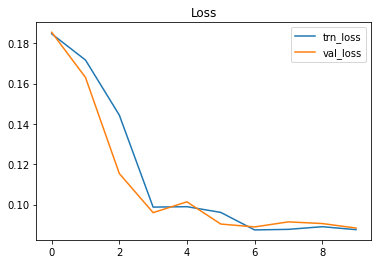

In [35]:
plt.plot(history.history["loss"], label="trn_loss");
plt.plot(history.history["val_loss"], label="val_loss");
plt.legend();
plt.title("Loss");

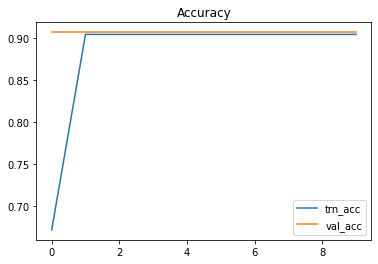

In [36]:
plt.plot(history.history["accuracy"], label="trn_acc");
plt.plot(history.history["val_accuracy"], label="val_acc");
plt.legend();
plt.title("Accuracy");

In [37]:
# Analyse the predictions of the model
# Now that the model is trained, we can look at some predictions on the training set.
y_pred = model.predict(X_seq, verbose=1, batch_size=1024)

1/1 [==============================] - 16s 16s/step


In [38]:
i = 343
pred_i = y_pred[i] > 0.05

In [40]:
tokenized[i]

Das Rezept stammt von einer Chinareise aus der Stadt Chongqing.Zunächst den Boden des Wok großzügig mit Öl bedecken und dieses auf höchster Stufe erhitzen. Das Geschnetzelte rundherum mit Mehl bestäuben und im Wok scharf anbraten, dann salzen. Das Fleisch herausnehmen, evtl. etwas Öl nachgeben und die gehackten Erdnüsse leicht anbraten. Die Erdnüsse herausnehmen und die Zwiebeln anbraten. Anschließend den gehackten Knoblauch hinzugeben und ebenfalls anbraten. Die Frühlingszwiebeln und die Chilischoten in Streifen schneiden und hinzugeben. Den Zucker darüber streuen und karamellisieren lassen.Fleisch und Erdnüsse wieder hinzugeben. Mit Wein ablöschen, aufkochen lassen und den Essig hinzugeben. Abschließend mit Sojasauce, Ingwer und Pfeffer (gut zerkleinern, sehr intensiv!) würzen und abschmecken.Auf Reis servieren.

In [41]:
ingreds = [t.text for t, p in zip(tokenized[i], pred_i) if p]
print(set(ingreds))

{'Boden', 'dieses', 'streuen', ')', '.', 'Geschnetzelte', 'Zwiebeln', 'Den', 'Frühlingszwiebeln', 'mit', 'Auf', 'aufkochen', 'Pfeffer', 'Die', 'Chilischoten', 'Stufe', 'intensiv', 'aus', 'Knoblauch', 'und', 'wieder', 'ebenfalls', 'Rezept', 'Sojasauce', 'bestäuben', 'rundherum', 'des', 'zerkleinern', 'Mit', 'Wein', 'Ingwer', 'Öl', 'Anschließend', 'Streifen', 'Essig', 'darüber', 'anbraten', 'Chongqing', '(', 'Reis', 'hinzugeben', 'schneiden', 'Fleisch', 'in', 'Das', 'auf', 'servieren', 'im', 'würzen', 'der', 'gut', 'Zucker', 'scharf', 'leicht', ',', 'einer', 'großzügig', 'karamellisieren', 'salzen', 'höchster', 'gehackten', 'den', 'stammt', 'Stadt', 'abschmecken', 'die', 'bedecken', 'lassen', '!', 'Chinareise', 'erhitzen', 'dann', 'herausnehmen', 'nachgeben', 'sehr', 'evtl.', 'Zunächst', 'Abschließend', 'Mehl', 'Erdnüsse', 'ablöschen', 'etwas', 'von', 'Wok'}


In [42]:
ingreds = [t.text for t, p in zip(tokenized[i], y_seq[i]) if p]
set(ingreds)

{'Chilischoten',
 'Erdnüsse',
 'Essig',
 'Frühlingszwiebeln',
 'Ingwer',
 'Mehl',
 'Sojasauce',
 'Streifen',
 'Zucker',
 'Zwiebeln',
 'Öl'}

In [43]:
ingredients[i]

'400 g Hühnerfleisch, geschnetzelt 1 EL Mehl 50 g Erdnüsse, ungesalzen und ohne Schale 1 Zwiebel(n), in Streifen geschnitten 2 Knoblauchzehe(n) 1 Bund Frühlingszwiebel(n) 2 Chilischote(n) 25 g Zucker 50 ml Weißwein (Kochwein) 1 EL Essig 10 Szechuanpfeffer, zerstoßen 2 g Ingwer, gehackt 20 ml Sojasauce, süße Öl'

In [44]:
# This looks very good! Our model seems to be able to identify the ingredients better than our training labels.
# So we now use the produced labels for fine-tuning the network.


In [45]:
new_labels = []
for pred_i, ti in zip(y_pred, tokenized):
    l_i = []
    ci = [t.text for t, p in zip(tokenized[i], pred_i > 0.05) if p]
    label = []
    for token in ti:
        l_i.append(any((c == token.text or c == token.text[:-1] or c[:-1] == token.text) for c in ci))
    new_labels.append(l_i)

In [46]:
y_seq_new = []
for l in new_labels:
    y_i = []
    for i in range(MAX_LEN):
        try:
            y_i.append(float(l[i]))
        except:
            y_i.append(0.0)
    y_seq_new.append(np.array(y_i))
y_seq_new = np.array(y_seq_new)
y_seq_new = y_seq.reshape(y_seq_new.shape[0], y_seq_new.shape[1], 1)

In [47]:
# We fit the network again for one epoch with the new labels.
history = model.fit(X_seq, y_seq_new, epochs=1, batch_size=256, validation_split=0.1)

11/11 [==============================] - 309s 28s/step - loss: 0.1048 - accuracy: 0.9114 - val_loss: 0.1002 - val_accuracy: 0.9140


In [44]:
# Look at test data
eval_ingredients = eval_df.Ingredients.values

In [45]:
eval_tokenized = [nlp(t) for t in eval_df.Instructions.values]

X_seq_test = prepare_sequences(eval_tokenized, max_len=MAX_LEN, vocab=vocab)

In [46]:
y_pred_test = model.predict(X_seq_test, verbose=1, batch_size=1024)

1/1 [==============================] - 2s 2s/step


In [48]:
i = 93
pred_i = y_pred_test[i] > 0.05
print(eval_tokenized[i])
print()
print(eval_ingredients[i])
print()
ingreds = [t.text for t, p in zip(eval_tokenized[i], pred_i) if p]
print(set(ingreds))

Rindfleisch waschen, mit Küchenpapier trockentupfen und in Gulaschwürfel schneiden. In einem Topf in heißem Schweineschmalz von allen Seiten anbraten, dabei vorsichtig umrühren.Zwiebeln und Knoblauch schälen. Zwiebeln grob, Knoblauch fein würfeln, zum Fleisch geben und bräunen. Das Mehl darüber stäuben und mit Fleisch und Zwiebeln verrühren. Mit der Fleischbrühe aufgießen. Mit Salz, Pfeffer, Majoran, Kümmel, Zucker und Paprika würzen. 40 Min. bei mittlerer Hitze kochen lassen.Kartoffeln schälen, waschen, abtropfen lassen und in Würfel schneiden. Paprikaschoten waschen, von Kernen und Scheidewänden befreien, in Würfel schneiden. Tomaten überbrühen, abziehen und in Würfel schneiden, dabei Kerne entfernen. Alles in die Suppe geben und nochmals 25 Min. kochen. Abschmecken, den Rotwein dazugießen, nicht mehr aufkochen.Die Gulaschsuppe mit Stangenweißbrot oder knusprigen Brötchen reichen. Dazu passt als Getränk ein kräftiger Rotwein oder auch ein Bier.Tipp: die Kartoffeln und Paprikaschoten 

In [49]:
i = 26
pred_i = y_pred_test[i] > 0.05
print(eval_tokenized[i])
print()
print(eval_ingredients[i])
print()
ingreds = [t.text for t, p in zip(eval_tokenized[i], pred_i) if p]
print(set(ingreds))

Kürbisfleisch würfeln. Möhren schälen und würfeln. Zwiebel schälen und fein hacken. Petersilie waschen, trocken schütteln und grob hacken.Putenschnitzel in 8 Streifen schneiden, wellenförmig auf Holzspieße stecken und mit Salz, Pfeffer und Paprika würzen.1 EL Pflanzencreme in einem Topf erhitzen, Kürbis, Möhren und Zwiebel darin ca. 5 Minuten dünsten, Brühe dazugießen und im geschlossenen Topf ca. 25 Minuten kochen.Mit einem Kartoffelstampfer grob zerstampfen, Cremefine und Petersilie unterheben und mit Salz und Pfeffer abschmecken.Restliche Pflanzencreme in einer Pfanne erhitzen, Putenspieße darin knusprig braun braten.Energie- und Nährstoffgehalt:Pro Portion:Energie (kcal): 353Energie (kJ): 1469Eiweiß (g): 23Kohlenhydrate (g): 20Fett (g): 20

500 g Kürbisfleisch 500 g Möhre(n) 1 Zwiebel(n) 1/2Bund Petersilie, glatte 400 g Putenschnitzel 3 EL RAMA Culinesse Pflanzencreme 250 ml Brühe, (Delikatessbrühe) 100 ml RAMA Cremefine zum Verfeinern Salz Pfeffer, frisch gemahlener Paprikapulver
